In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from swimnetworks_local import dense, linear
from swimnetworks_local import deeponet, pod_deeponet

### Read the data and split it into training and test sets

In [2]:
u0 = np.load("u0.npy") # initial conditions
u1 = np.load("u1.npy") # solutions

# Split data
n_samples = u0.shape[0] # number of samples
train_size = int(0.8 * n_samples) # 80% of data for training

u0_train, u0_test = u0[:train_size, :], u0[train_size:, :]
u1_train, u1_test = u1[:train_size, :], u1[train_size:, :]
epsilon = np.linspace(0, 2*np.pi, 256).reshape(-1, 1)

# Print shapes
print(f"u0_train shape: {u0_train.shape}")
print(f"u0_test shape: {u0_test.shape}")
print(f"u1_train shape: {u1_train.shape}")
print(f"u1_test shape: {u1_test.shape}")
print(f"grid shape: {epsilon.shape}")

u0_train shape: (12000, 256)
u0_test shape: (3000, 256)
u1_train shape: (12000, 256)
u1_test shape: (3000, 256)
grid shape: (256, 1)


### Define the branch net and the trunk net

In [3]:
# Branch net
branch_steps = [
    ("dense", dense.Dense(layer_width=1024, activation="tanh",
                    parameter_sampler="tanh",
                    random_seed=42)),
    ("linear", linear.Linear(regularization_scale=1e-10))
]
branch_net = Pipeline(branch_steps)

# Trunk net
trunk_steps = [
    ("dense", dense.Dense(layer_width=1024, activation="tanh",
                    parameter_sampler="tanh",
                    random_seed=43)), 
    ("linear", linear.Linear(regularization_scale=1e-10))
]
trunk_net = Pipeline(trunk_steps)

# Creating a DataFrame to store results (you can load it from 'results.xlsx' if it already exists)

results_df = pd.DataFrame(columns=['n_modes', 'Training_Loss', 'Test_Loss'])

for n_modes in [2, 4, 8, 16, 32, 64, 128, 256]:  # Add or change values as you wish
    
    # Create and fit model
    model = deeponet.DeepONet(n_modes=n_modes, 
                              branch_pipeline=branch_net, 
                              trunk_pipeline=trunk_net)
    loss_dict = model.fit(u0_train, u1_train, epsilon)
    train_loss = loss_dict['loss']
    
    # Make predictions
    predictions = model.transform(u0_test)
    test_loss = np.sum(np.linalg.norm(predictions - u1_test, axis=1) / np.linalg.norm(u1_test, axis=1)) / u1_test.shape[0] 
    
    results_df = results_df.append({'n_modes': n_modes,
                                'Training_Loss': train_loss,
                                'Test_Loss': test_loss}, ignore_index=True)



Iteration 0 | Relative L2 Loss: 0.40397555157188647
Iteration 1 | Relative L2 Loss: 0.4039755515634762
Converged after 1 iterations | Loss: 0.4039755515634762


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.3051280089134748
Iteration 1 | Relative L2 Loss: 0.15253192304631633
Iteration 2 | Relative L2 Loss: 0.15253192248133995
Converged after 2 iterations | Loss: 0.15253192248133995


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.41546684105316806
Iteration 1 | Relative L2 Loss: 0.020652848786552526
Iteration 2 | Relative L2 Loss: 0.02065287915691268
Converged after 2 iterations | Loss: 0.02065287915691268


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.4176950051112294
Iteration 1 | Relative L2 Loss: 0.0024405907608616474
Iteration 2 | Relative L2 Loss: 0.0024404965658221785
Converged after 2 iterations | Loss: 0.0024404965658221785


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.41769499941868676
Iteration 1 | Relative L2 Loss: 0.002431149975582499
Iteration 2 | Relative L2 Loss: 0.0024308192202453656
Converged after 2 iterations | Loss: 0.0024308192202453656


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.4176950099820853
Iteration 1 | Relative L2 Loss: 0.0024314032679039893
Iteration 2 | Relative L2 Loss: 0.0024308979327543863
Converged after 2 iterations | Loss: 0.0024308979327543863


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.4176950100343427
Iteration 1 | Relative L2 Loss: 0.0024315570881757666
Iteration 2 | Relative L2 Loss: 0.0024310671865454157
Converged after 2 iterations | Loss: 0.0024310671865454157


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


Iteration 0 | Relative L2 Loss: 0.4176950100342821
Iteration 1 | Relative L2 Loss: 0.0024333638722759173
Iteration 2 | Relative L2 Loss: 0.002432857472328435
Converged after 2 iterations | Loss: 0.002432857472328435


/var/folders/tp/jj7lj8gn7wx32whgd49g84cc0000gn/T/ipykernel_43512/697890503.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'n_modes': n_modes,


In [4]:
# n_modes to int
results_df['n_modes'] = results_df['n_modes'].astype(int)


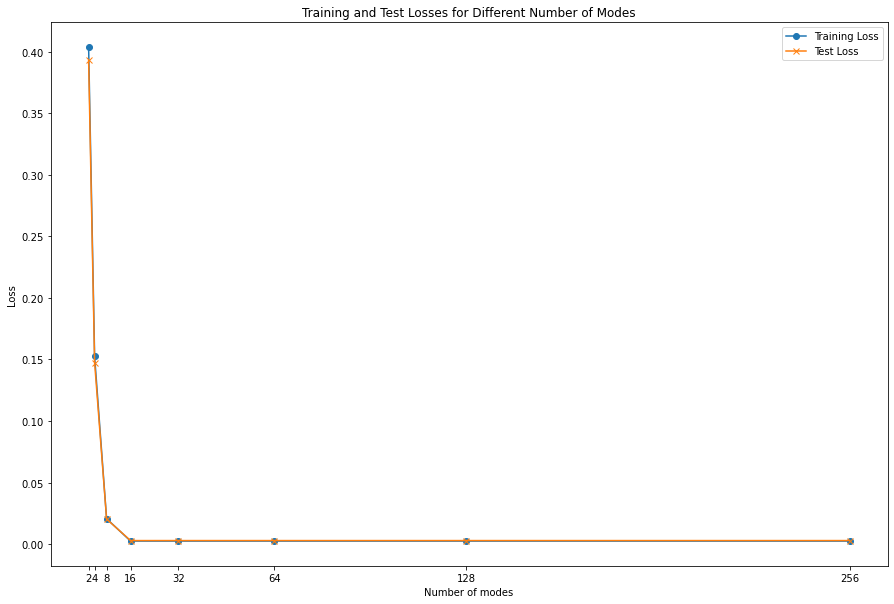

In [5]:
plt.figure(figsize=(15, 10))

plt.plot(results_df['n_modes'], results_df['Training_Loss'], marker='o', label='Training Loss')
plt.plot(results_df['n_modes'], results_df['Test_Loss'], marker='x', label='Test Loss')

plt.xticks(results_df['n_modes'])

plt.xlabel('Number of modes')
plt.ylabel('Loss')
plt.title('Training and Test Losses for Different Number of Modes')
plt.legend()

plt.show()

In [6]:
predictions = model.transform(u0_test)

# Mean Relative L2 Loss
relative_L2_loss = np.sum(np.linalg.norm(predictions - u1_test, axis=1) / np.linalg.norm(u1_test, axis=1)) / u1_test.shape[0]
print(f"Mean Relative L2 Loss on Test Data: {relative_L2_loss}")

Mean Relative L2 Loss on Test Data: 0.0028629807143694098


### Trying the POD-DeepONet with the same data

In [7]:
steps = [
    ("dense", dense.Dense(layer_width=1024, activation="tanh",
                    parameter_sampler="tanh",
                    random_seed=42)),
    ("linear", linear.Linear(regularization_scale=1e-10))
]
net = Pipeline(steps)

pod_model = pod_deeponet.DeepONetPOD(net)
pod_model.fit(u0_train, u1_train)

DeepONetPOD(pipeline=Pipeline(steps=[('dense',
                 Dense(activation=<function Base.tanh_activation at 0x7fb104f88280>, biases=array([[ 0.38405669, -0.02988148, -0.23111836, ..., -0.12158318,
         2.93236497, -0.03510717]]), idx_from=array([ 3977, 11762,  2629, ...,  6448,  4200,  4708]), idx_to=array([6395, 4721, 3286, ..., 6899, 9343, 6355]), layer_width=1024, n_parameters=263168, parameter_sampler=<bound metho...
        -3.55171076e-02,  2.90195681e-01,  9.51703111e-02],
       ...,
       [-9.17473936e-04,  3.39485417e-02,  1.88575616e-02, ...,
        -1.13206538e-03, -9.47241931e-04,  5.66547349e-04],
       [-3.45691372e-04,  1.04877673e-02, -1.06208604e-02, ...,
        -2.03914187e-04,  5.31764153e-04,  1.07069262e-03],
       [-2.92748525e+00, -8.77053165e+01,  5.02618080e+00, ...,
        -1.04808147e+00, -7.55308431e-01,  8.28965569e+00]])))]), n_modes=32)

In [8]:
pod_predictions = pod_model.transform(u0_test)

# Mean Relative L2 Loss
relative_L2_loss_pod = np.sum(np.linalg.norm(pod_predictions - u1_test, axis=1) / np.linalg.norm(u1_test, axis=1)) / u1_test.shape[0]
print(f"Mean Relative L2 Loss on Test Data: {relative_L2_loss_pod}")

Mean Relative L2 Loss on Test Data: 0.0028620152898630965
